In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [95]:
df = pd.read_excel("carsales10.xlsx")
df.Ilk_Rez_Flag.value_counts()
df.size

532422

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler

In [135]:
df2=df.copy()
df.head()
df.MusteriGelisKanali.value_counts()
#Acenteleri birleştirebiliriz

Şube (Ofis)             22993
Web (garenta.com.tr)    13342
Mobil                   10020
Call Center              7998
Broker                   4670
Acente - Full Credit      125
Acente - Kredi Kartı       10
Name: MusteriGelisKanali, dtype: int64

In [136]:
df2['Ay'] = df2['Tarih'].dt.strftime("%m")
df2['Yıl'] = df2['Tarih'].dt.strftime("%Y")
df2

,CIKISSUBE.ASUBETX,Gün,Tarih,MusteriGelisKanali,PRC_GRUP_KODU,Kira_Gunu,Durum Rezervasyon Açıklama,Ilk_Rez_Flag,Fiyat,Ay,Yıl
0,Adana Havalimanı,Fri,2022-02-04,Call Center,T6,270,Kirada,-,246321.076271,02,2022
1,İzmir Alsancak Şehir,Thu,2021-02-18,Call Center,W9,345,Rez. Tamamlandı,1,175344.525424,02,2021
2,İstanbul Havalimanı,Fri,2022-04-15,Call Center,M1,188,Kirada,-,137810.779661,04,2022
3,İstanbul Havalimanı,Sat,2021-10-09,Şube (Ofis),T1,264,Rez. Tamamlandı,-,130747.237288,10,2021
4,Adana Havalimanı,Mon,2022-05-23,Call Center,G5,154,Kirada,1,92848.661017,05,2022
...,...,...,...,...,...,...,...,...,...,...,...
59153,Adana Havalimanı,Sun,2020-01-05,Web (garenta.com.tr),A1,1,Rez. Tamamlandı,-,61.440678,01,2020
59154,Adana Havalimanı,Sun,2019-10-06,Web (garenta.com.tr),O3,1,Rez. Tamamlandı,-,58.474576,10,2019
59155,Erzurum Şehir,Mon,2020-04-27,Web (garenta.com.tr),Z2,1,Rez. Tamamlandı,-,57.627119,04,2020
59156,Adana Havalimanı,Tue,2020-01-14,Call Center,B1,1,Rez. Tamamlandı,-,55.084746,01,2020


In [137]:
df2['Ilk_Rez_Flag'] = df2['Ilk_Rez_Flag'].astype(str)


In [138]:
df2.loc[df2.Ilk_Rez_Flag=="-","Ilk_Rez_Flag"] = 0
df2
df2.MusteriGelisKanali[(df2.MusteriGelisKanali=='Acente - Kredi Kartı') | (df2.MusteriGelisKanali== 'Acente - Full Credit')]="Acente"

df2.MusteriGelisKanali.value_counts()


C:\Users\ahmet\anaconda3\envs\new_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Şube (Ofis)             22993
Web (garenta.com.tr)    13342
Mobil                   10020
Call Center              7998
Broker                   4670
Acente                    135
Name: MusteriGelisKanali, dtype: int64

In [139]:
df2.drop(labels=["Tarih","Durum Rezervasyon Açıklama"],axis=1,inplace=True)

In [140]:
df3 = pd.get_dummies(df2, columns=["CIKISSUBE.ASUBETX","Gün","MusteriGelisKanali","PRC_GRUP_KODU","Ilk_Rez_Flag","Ay","Yıl"], drop_first=False)

In [141]:
min_max_scaler = MinMaxScaler()

In [142]:
df3[['Kira_Gunu']] = min_max_scaler.fit_transform(df3[['Kira_Gunu']])

In [143]:
df3.head()

,Kira_Gunu,Fiyat,CIKISSUBE.ASUBETX_Adana Havalimanı,CIKISSUBE.ASUBETX_Erzurum Şehir,CIKISSUBE.ASUBETX_Samsun Şehir,CIKISSUBE.ASUBETX_İstanbul Havalimanı,CIKISSUBE.ASUBETX_İzmir Alsancak Şehir,Gün_Fri,Gün_Mon,Gün_Sat,...,Ay_07,Ay_08,Ay_09,Ay_10,Ay_11,Ay_12,Yıl_2019,Yıl_2020,Yıl_2021,Yıl_2022
0,0.561587,246321.076271,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0.718163,175344.525424,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.390397,137810.779661,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.549061,130747.237288,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0.319415,92848.661017,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
df4=df3.copy()

In [145]:
x_scale = df4.drop(["Fiyat"], axis = 1)
y = df4["Fiyat"]

In [146]:
x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(x_scale, y, test_size=0.3, random_state = 144)

In [147]:
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=0.5, random_state = 144)

In [73]:
model = Sequential([    Dense(132, activation='relu', input_dim=110),    Dense(132, activation='relu'),    Dense(1, activation='relu'),])

In [151]:
early_stopping = callbacks.EarlyStopping(min_delta=0.009,patience=20,restore_best_weights=True)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[109]),
    layers.Dense(132, activation='relu'),
    layers.Dense(1),
])

In [152]:
model.compile(optimizer='adam',   loss='mae'  , metrics=['mape'])

In [153]:
history = model.fit(x_train, y_train, batch_size=512, epochs=150,  validation_data=(x_val, y_val))

Epoch 1/150
81/81 [==============================] - 1s 9ms/step - loss: 1747.2220 - mape: 86.3786 - val_loss: 1498.6553 - val_mape: 64.3276
Epoch 2/150
81/81 [==============================] - 0s 5ms/step - loss: 1456.1411 - mape: 93.3869 - val_loss: 1371.6462 - val_mape: 100.8301
Epoch 3/150
81/81 [==============================] - 1s 7ms/step - loss: 1382.8756 - mape: 96.5814 - val_loss: 1321.6888 - val_mape: 94.5258
Epoch 4/150
81/81 [==============================] - 1s 6ms/step - loss: 1334.7789 - mape: 90.9146 - val_loss: 1292.6740 - val_mape: 91.9915
Epoch 5/150
81/81 [==============================] - 0s 6ms/step - loss: 1309.1005 - mape: 87.3962 - val_loss: 1275.3676 - val_mape: 90.0473
Epoch 6/150
81/81 [==============================] - 0s 6ms/step - loss: 1292.2418 - mape: 85.1697 - val_loss: 1261.6460 - val_mape: 87.9983
Epoch 7/150
81/81 [==============================] - 0s 6ms/step - loss: 1278.7416 - mape: 83.0094 - val_loss: 1250.6760 - val_mape: 86.9786
Epoch 8/150


81/81 [==============================] - 0s 5ms/step - loss: 326.1870 - mape: 17.3053 - val_loss: 320.6425 - val_mape: 18.9949
Epoch 60/150
81/81 [==============================] - 0s 5ms/step - loss: 323.3033 - mape: 16.8896 - val_loss: 317.6652 - val_mape: 17.4371
Epoch 61/150
81/81 [==============================] - 0s 5ms/step - loss: 323.0775 - mape: 17.1888 - val_loss: 316.3881 - val_mape: 17.5276
Epoch 62/150
81/81 [==============================] - 0s 5ms/step - loss: 320.0517 - mape: 16.7439 - val_loss: 314.9539 - val_mape: 17.6807
Epoch 63/150
81/81 [==============================] - 0s 5ms/step - loss: 318.4460 - mape: 16.7047 - val_loss: 312.7354 - val_mape: 17.8640
Epoch 64/150
81/81 [==============================] - 0s 5ms/step - loss: 317.7862 - mape: 16.8898 - val_loss: 313.4126 - val_mape: 17.3935
Epoch 65/150
81/81 [==============================] - 0s 5ms/step - loss: 316.3364 - mape: 16.7668 - val_loss: 312.3624 - val_mape: 18.0097
Epoch 66/150
81/81 [=============

81/81 [==============================] - 0s 6ms/step - loss: 272.2859 - mape: 15.3211 - val_loss: 287.2812 - val_mape: 18.6061
Epoch 118/150
81/81 [==============================] - 1s 7ms/step - loss: 271.9109 - mape: 15.3318 - val_loss: 283.6464 - val_mape: 17.1205
Epoch 119/150
81/81 [==============================] - 0s 6ms/step - loss: 270.8542 - mape: 15.2695 - val_loss: 284.8617 - val_mape: 18.1858
Epoch 120/150
81/81 [==============================] - 0s 6ms/step - loss: 271.0465 - mape: 15.3654 - val_loss: 284.0089 - val_mape: 17.2016
Epoch 121/150
81/81 [==============================] - 1s 7ms/step - loss: 269.5603 - mape: 15.0646 - val_loss: 285.0331 - val_mape: 18.0382
Epoch 122/150
81/81 [==============================] - 0s 5ms/step - loss: 271.0470 - mape: 15.4924 - val_loss: 285.3962 - val_mape: 17.2128
Epoch 123/150
81/81 [==============================] - 0s 5ms/step - loss: 269.6544 - mape: 15.2599 - val_loss: 284.0166 - val_mape: 17.3184
Epoch 124/150
81/81 [======

Minimum Validation Loss: 279.4001
14.893227577209473


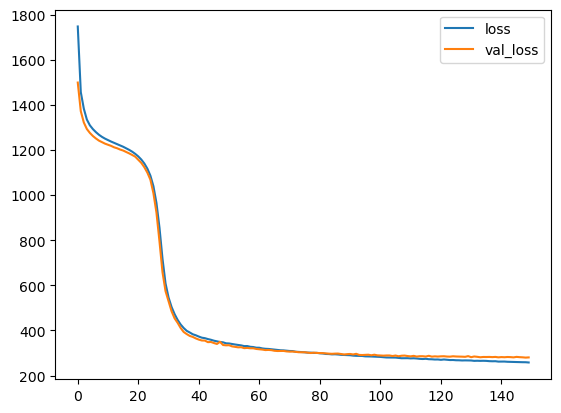

In [154]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));
print(history_df["mape"].min())

In [155]:
model.evaluate(x_test, y_test)

278/278 [==============================] - 0s 2ms/step - loss: 295.7652 - mape: 17.8125


[295.76519775390625, 17.812519073486328]

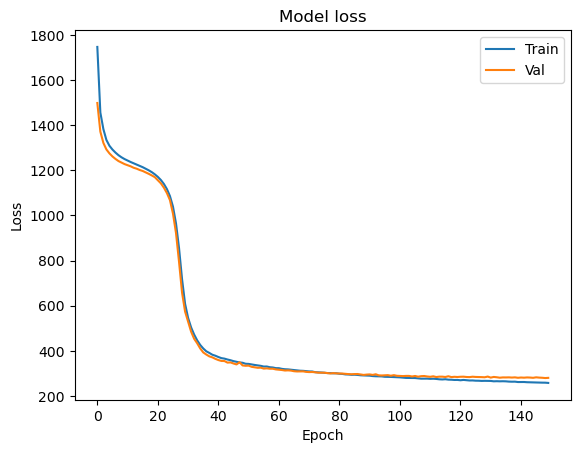

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()